In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=3)

In [2]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [3]:
y = np.array([0., 1., 1., 0.]).reshape(4,1)
y

array([[0.],
       [1.],
       [1.],
       [0.]])

In [4]:
np.random.seed(2045)
W1 = np.random.rand(3,4)
W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

In [5]:
np.random.seed(2046)
W2 = np.random.rand(4)


W2

array([0.895, 0.596, 0.436, 0.153])

In [6]:
np.random.seed(2046)
W2 = np.random.rand(4)
W2 = W2.reshape(4,1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

In [7]:
np.random.seed(2045)
y_hat = np.random.rand(4).reshape(4,1)
y_hat

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

In [8]:
Layer1 = np.ones([4,4])
Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
def sigmoid(x):
  y = 1/(1+np.exp(-x))
  return y

In [10]:
def d_sigmoid(x):
  dy = x * (1.0-x)
  return dy

In [11]:
def loss_function(y, y_hat):
  Loss = -np.mean((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return Loss

In [12]:
def forwardProp(X, W1, Layer1, W2, y_hat):
  Layer1 = sigmoid(np.dot(X,W1))
  y_hat = sigmoid(np.dot(Layer1, W2))

  return Layer1, y_hat

In [13]:
def backProp(X, y, y_hat, Layer1, W1, W2):
  d_W2 = np.dot(np.transpose(Layer1), (-2 *(y-y_hat) * d_sigmoid(y_hat)))

  d_W1 = np.dot((-2 * (y-y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
  d_W1 = d_W1 * d_sigmoid(Layer1)
  d_W1 = np.dot(np.transpose(X), d_W1)

  W1 = W1 - d_W1
  W2 = W2 - d_W2

  return y_hat, Layer1, W1, W2

In [14]:
Loss_Record = []

In [15]:
for k in range(0, 1000):
  Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
  y_hat, Layer_1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)

  Loss_Record.append(loss_function(y,y_hat))

In [16]:
W1

array([[ 2.165,  4.556,  6.252, -4.313],
       [ 2.453,  4.884, -2.953,  6.58 ],
       [ 1.547, -0.552,  0.307,  1.498]])

In [17]:
W2

array([[ 3.89 ],
       [ 7.401],
       [-7.353],
       [-7.362]])

In [18]:
y_hat

array([[0.013],
       [0.964],
       [0.965],
       [0.044]])

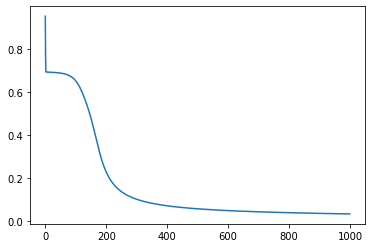

In [19]:
import matplotlib.pyplot as plt

plt.plot(Loss_Record)
plt.show()